In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [169]:
mu = [np.array([1, 0]), np.array([-0.5, 0.5*np.sqrt(3)]), np.array([-0.5, -0.5*np.sqrt(3)])]
cov = np.identity(2)
size = 30
K = 3
x = [np.random.multivariate_normal(mu[k], 0.25*I, size=size) for k in range(K)]

m = [np.mean(y, axis=0) for y in x] # sample means

def slope(j, k):
    return -(m[k][0] - m[j][0])/(m[k][1] - m[j][1])

def intercept(j, k):
    return 0.5*(m[k].dot(m[k]) - m[j].dot(m[j]))/(m[k][1] - m[j][1])

m01 = slope(0, 1)
m02 = slope(0, 2)
m12 = slope(1, 2)

b01 = intercept(0, 1)
b02 = intercept(0, 2)
b12 = intercept(1, 2)

P = ((b01 - b02)/(m02 - m01), m01*xx + b01)
Q01 = ((2 - b01)/m01, 2)
Q02 = ((-2 - b02)/m02, -2)
Q12 = (-2, m12*(-2) + b12)

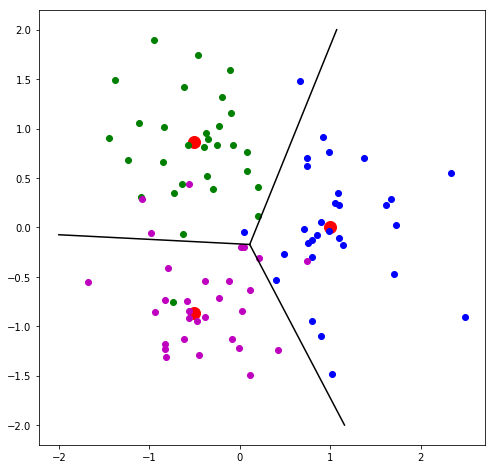

In [170]:
markers = ['bo', 'go', 'mo']
plt.figure(figsize=(8, 8))
for k in range(K):
    plt.plot(mu[k][0], mu[k][1], 'ro', markersize=12)
    plt.plot(x[k][:,0], x[k][:,1], markers[k])
plt.plot([P[0], Q01[0]], [P[1], Q01[1]], 'k')
plt.plot([P[0], Q02[0]], [P[1], Q02[1]], 'k')
plt.plot([P[0], Q12[0]], [P[1], Q12[1]], 'k')
plt.show()